    A driven data analysis of the survival factors in the titanic tragic sink
   

In [3]:
import pandas as pd

file_path = '/mnt/data/titanic_data_dirty.csv'
dataset = pd.read_csv('titanic_data_dirty.csv')

# Display the first few rows to understand its structure
dataset.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,TRUE,NaN,Southampton,no,FALSE
1,1,1,female,38.0,1,0,71.2833,C,First,woman,FALSE,C,Cherbourg,yes,FALSE
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,FALSE,NaN,Southampton,yes,TRUE
3,1,1,female,35.0,1,0,53.1000,S,First,woman,FALSE,C,Southampton,yes,FALSE
4,0,3,male,35.0,0,0,8.0500,S,Third,man,TRUE,NaN,Southampton,no,TRUE


In [4]:
# Checking for missing values
missing_values = titanic_data.isnull().sum()

# Display missing values
missing_values


survived         0
pclass           0
sex              0
age            179
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           697
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Descriptive statistics
desc_stats = titanic_data.describe()

# Data types and basic info
data_info = titanic_data.info()

# Display first few rows for a quick glance
first_rows = titanic_data.head()

# Display the results
desc_stats, data_info, first_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     901 non-null    int64  
 1   pclass       901 non-null    int64  
 2   sex          901 non-null    object 
 3   age          722 non-null    float64
 4   sibsp        901 non-null    int64  
 5   parch        901 non-null    int64  
 6   fare         901 non-null    float64
 7   embarked     899 non-null    object 
 8   class        901 non-null    object 
 9   who          901 non-null    object 
 10  adult_male   901 non-null    object 
 11  deck         204 non-null    object 
 12  embark_town  899 non-null    object 
 13  alive        901 non-null    object 
 14  alone        901 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 105.7+ KB


(         survived      pclass         age       sibsp       parch        fare
 count  901.000000  901.000000  722.000000  901.000000  901.000000  901.000000
 mean     0.385128    2.311876   29.681676    0.523862    0.384018   32.034914
 std      0.486896    0.833575   14.541591    1.103901    0.817265   49.450593
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   20.000000    0.000000    0.000000    7.925000
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200,
 None,
    survived  pclass      sex   age  sibsp  parch     fare embarked  class  \
 0         0       3     male  22.0      1      0   7.2500        S  Third   
 1         1       1  female   38.0      1      0  71.2833        C  First   
 2         1       3   female  26.0      0     

In [10]:
# Handling missing values: Impute or drop
dataset['age'].fillna(dataset['age'].median(), inplace=True)
dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)
dataset.drop(columns=['class'], inplace=True)  # Too many missing values

# Convert categorical variables to numeric
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})
dataset = pd.get_dummies(dataset, columns=['embarked'], drop_first=True)

# Correlation matrix
correlation_matrix = titanic_data.corr()

# Survival rate by different classes
survival_by_class = dataset.groupby('pclass')['survived'].mean()

# Survival rate by gender
survival_by_gender = dataset.groupby('sex')['survived'].mean()

# Survival rate by age
survival_by_age = dataset.groupby(pd.cut(dataset['age'], bins=10))['survived'].mean()

# Display the results
correlation_matrix, survival_by_class, survival_by_gender, survival_by_age


(          survived    pclass       age     sibsp     parch      fare
 survived  1.000000 -0.337335 -0.072411 -0.040891  0.071890  0.253460
 pclass   -0.337335  1.000000 -0.370745  0.085484  0.022982 -0.548888
 age      -0.072411 -0.370745  1.000000 -0.312366 -0.181289  0.095913
 sibsp    -0.040891  0.085484 -0.312366  1.000000  0.411034  0.159554
 parch     0.071890  0.022982 -0.181289  0.411034  1.000000  0.213324
 fare      0.253460 -0.548888  0.095913  0.159554  0.213324  1.000000,
 pclass
 1    0.629630
 2    0.478723
 3    0.243461
 Name: survived, dtype: float64,
 sex
 0.0    0.191050
 1.0    0.744409
 Name: survived, dtype: float64,
 age
 (0.34, 8.378]       0.654545
 (8.378, 16.336]     0.416667
 (16.336, 24.294]    0.355932
 (24.294, 32.252]    0.340974
 (32.252, 40.21]     0.438017
 (40.21, 48.168]     0.342857
 (48.168, 56.126]    0.478261
 (56.126, 64.084]    0.375000
 (64.084, 72.042]    0.000000
 (72.042, 80.0]      0.500000
 Name: survived, dtype: float64)

Text(0, 0.5, 'Survival Rate')

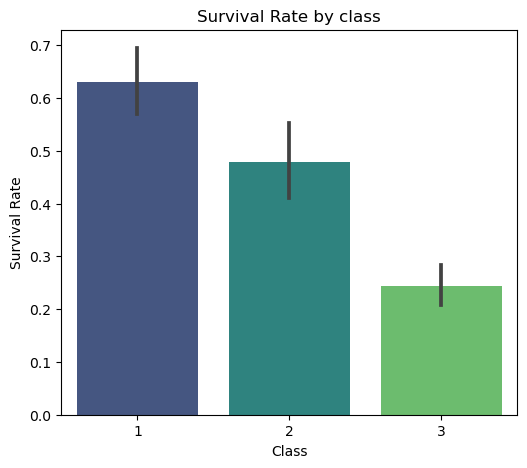

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 5))

# Survival rate by class
plt.subplot(1, 3, 1)
sns.barplot(x='pclass', y='survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')


Text(0, 0.5, 'Survival Rate')

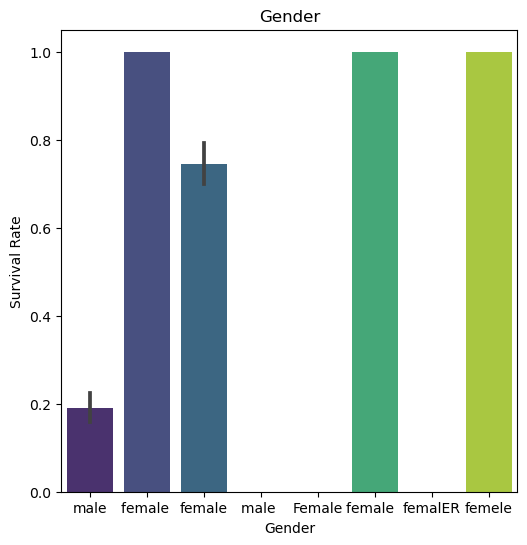

In [20]:
# Survival rate by gender
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
sns.barplot(x='sex', y='survived', data=titanic_data, palette='viridis')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

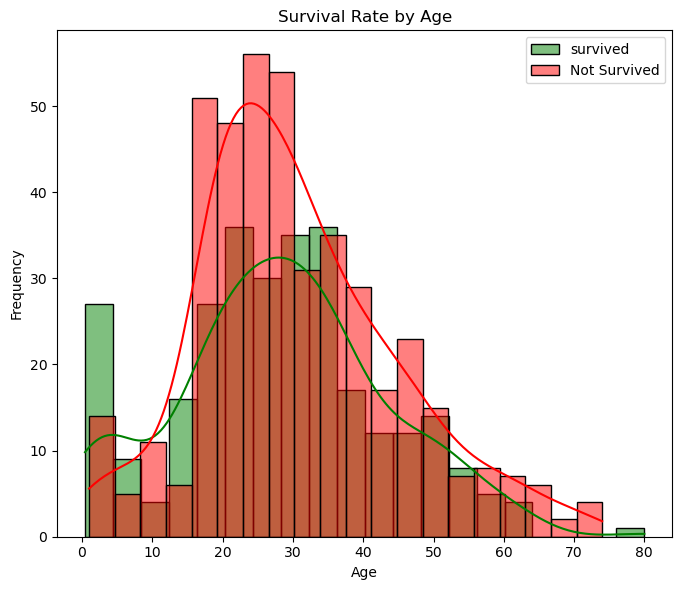

In [25]:
plt.figure(figsize=(20, 6))

# Survival rate by age
plt.subplot(1, 3, 3)
sns.histplot(titanic_data[titanic_data['survived'] == 1]['age'], bins=20, kde=True, color='green', label='survived')
sns.histplot(titanic_data[titanic_data['survived'] == 0]['age'], bins=20, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Insights from the Analysis;

Class Matters: The likelihood of survival was highly correlated with the class of travel. First-class passengers had a survival rate of over 60%, while third-class passengers had a survival rate below 25% as seen from the visualization above.

**Gender Differences: Female passengers had a survival rate of 74%, compared to 19% for male passengers.
**Age Factor: Younger passengers, especially children, had higher survival rates as seen from the visualization.


#  Conclusion:

The analysis of the Titanic dataset highlights the disparities in survival rates based on class, gender, and age. These insights provide a poignant reminder of the human stories behind the data, emphasizing the importance of equitable safety measures in such scenarios.